# Overview

This is a notebook to acquire a generic data understanding.

In [15]:
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt
from urllib.parse import urlparse
import itertools

# NLTK and spacy
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy

#Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')
nltk.download('vader_lexicon')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package vader_lexicon to C:\Users\Ng Wei
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [110]:
# Read dataframe
# Ensure that data is placed in /data
df = pd.read_csv("../data/indonesia_news_jan_may_2020.csv", index_col = 0)

# Display df dimensions
print(df.shape)

# Apply correct datatype
df['Author'] = df['Author'].apply(lambda x: literal_eval(x))
df['NormalisedDate'] = pd.to_datetime(df['NormalisedDate'])


df.head(20)

(7030, 5)


,NormalisedDate,SOURCEURL,Title,Author,Text
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E..."
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n..."
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar..."
5,2020-04-01,https://www.orissapost.com/enough-of-theatrics/,Enough of theatrics,[],The unplanned manner in which Prime Minister M...
6,2020-04-01,https://www.vir.com.vn/historic-deal-augurs-tr...,Historic deal augurs trade renaissance,"[Vietnam Investment Review - Vir, Thanh Dat]",The 29th meeting of the RCEP Trade Negotiation...
7,2020-04-01,https://www.msn.com/en-in/entertainment/bollyw...,Tablighi Jamaat congregation: First link was s...,[],© Provided by The Indian Express\n\nThe connec...
8,2020-04-01,https://www.ndtv.com/video/news/news/6-who-att...,6 Who Attended Delhi Mosque Congregation Die O...,[],Six people who attended a congregation at a mo...
9,2020-04-01,https://www.businessadvantagepng.com/how-can-p...,How can Papua New Guinea fight African swine f...,"[Paul Chai, Business Advantage Png, Laura Wate...",by\n\nWith the recent death of more than 300 p...


In [112]:
print(df.isna().any())
print(df[df.Title.isna()].SOURCEURL) ## Could ignore due to low number of missing values and non-crucial field

NormalisedDate    False
SOURCEURL         False
Title              True
Author            False
Text              False
dtype: bool
4193    https://www.dw.com/overlay/media/en/indonesias...
4261    https://www.dw.com/overlay/media/en/slash-and-...
5016    https://www.dw.com/overlay/media/en/indonesia-...
6532    http://en.acnnewswire.com/press-release/englis...
Name: SOURCEURL, dtype: object


# Date/Volume

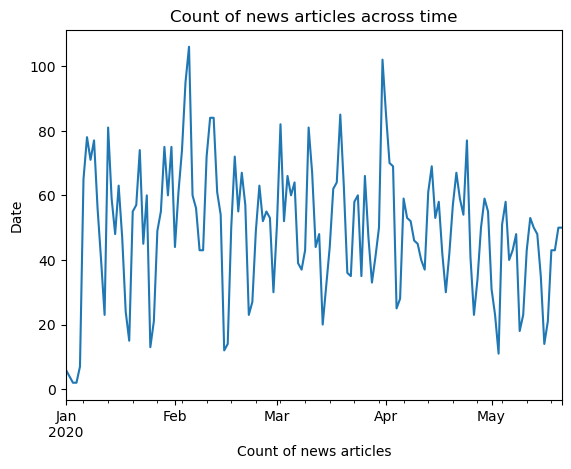

In [17]:
# Generic Trend across date
df.groupby('NormalisedDate')['Title'].count().plot()
plt.xlabel('Count of news articles')
plt.ylabel('Date')
plt.title('Count of news articles across time')

plt.show()

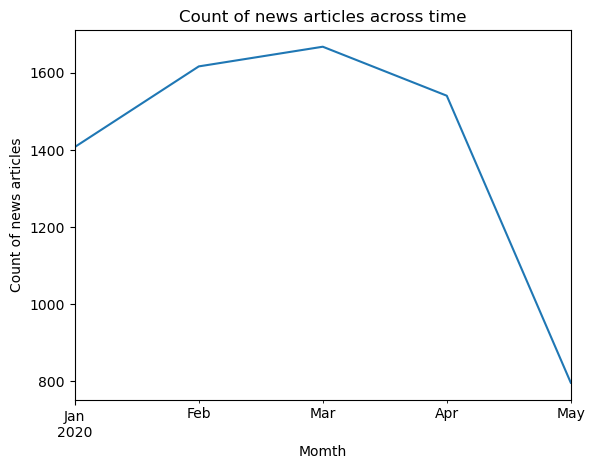

In [21]:
# Generic Trend across months
df_copy = df.copy()
df_copy['months'] = df_copy.NormalisedDate.dt.to_period('M')
df_copy.groupby('months')['Title'].count().plot()
plt.ylabel('Count of news articles')
plt.xlabel('Month')
plt.title('Count of news articles across time')

plt.show()

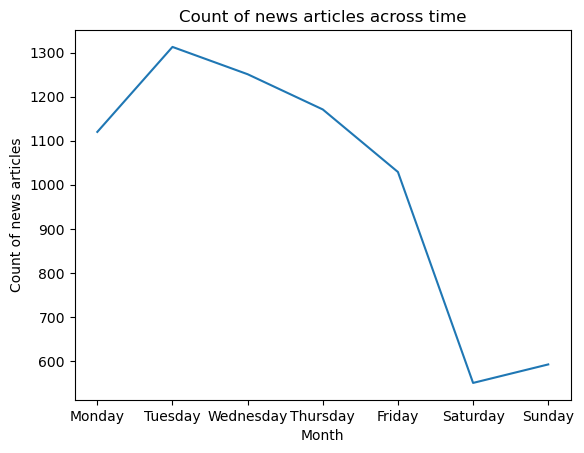

In [30]:
class_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy['weekday'] = df_copy.NormalisedDate.dt.day_name().astype(str)

df_grouped = df_copy.groupby('weekday')['Title'].count()
df_grouped.loc[class_list].plot()
plt.ylabel('Count of news articles')
plt.xlabel('Month')
plt.title('Count of news articles across time')

plt.show()

# URL

In [31]:
# Extract source where source is defined as 
to_filter = ['PERCENT', 'CARDINAL', 'MONEY', 'DATE',  'QUANTITY', 'ORDINAL', 'TIME']
df['source'] = df['SOURCEURL'].str.split('/').str.get(2).replace(r'www[\d]?.', '', regex=True).apply(lambda x: '.'.join(x.split('.')[:-1]) if len(x.split('.'))>1 else x)

sorted(list(df['source'].unique()))

['1460kltc.iheart',
 '325.nostate',
 '35mmc',
 '365.military',
 '680news',
 '7news.com',
 '929thebull',
 '9and10news',
 '9news.com',
 'aa.com',
 'aawsat',
 'abbynews',
 'abc.net',
 'abc11',
 'abc7news',
 'abcnews.go',
 'aberdeennews',
 'abqjournal',
 'abudhabicityguide',
 'accesswdun',
 'adaderana',
 'adelaidenow.com',
 'adgully',
 'adn',
 'adonis49.wordpress',
 'adventuretravelnews',
 'advocate',
 'aerosociety',
 'aerospace-technology',
 'aerospacemanufacturinganddesign',
 'aerotechnews',
 'aerotelegraph',
 'af.reuters',
 'afghanistantimes',
 'afr',
 'africanews',
 'afrik21',
 'agassizharrisonobserver',
 'agcanada',
 'agenda',
 'agmetalminer',
 'agriculture',
 'agupdate',
 'aidspan',
 'ainonline',
 'airdrietoday',
 'airforce-technology',
 'airport-technology',
 'akipress',
 'al-monitor',
 'alaraby.co',
 'albawaba',
 'alexinwanderland',
 'aljazeera',
 'all-noise.co',
 'allafrica',
 'allhiphop',
 'allindiaroundup',
 'am970theanswer',
 'americanmilitarynews',
 'amm',
 'amusingplanet',
 '

In [32]:
df[df['source'].str.contains('yahoo')]

,NormalisedDate,SOURCEURL,Title,Author,Text,source
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...",in.news.yahoo
12,2020-04-01,https://in.news.yahoo.com/coronavirus-delhi-sh...,Coronavirus: Delhi SHOs told to check mosques,[Mahender Singh Manral],The direction came after Nalwa sent a list to ...,in.news.yahoo
47,2020-04-01,https://in.news.yahoo.com/using-tourist-visas-...,Using tourist visas in violation of the norms ...,[Vicky Nanjappa],"New Delhi, Apr 01: The Tablighi Jamaat congreg...",in.news.yahoo
77,2020-04-01,https://in.news.yahoo.com/mamata-banerjee-urge...,Mamata Banerjee Urges Centre to Sanction Rs 25...,[],Kolkata: Raising concern over the financial bu...,in.news.yahoo
144,2020-03-08,https://www.yahoo.com/news/whats-us-taliban-de...,What's inside the US deal with the Taliban to ...,[Conor Finnegan],In a historic signing ceremony with the top U....,yahoo
...,...,...,...,...,...,...
6863,2020-03-04,https://au.news.yahoo.com/indonesia-seizes-hal...,Indonesia seizes half a million virus masks am...,[],Vendors wearing outfits of local superhero Gun...,au.news.yahoo
6894,2020-03-04,https://uk.news.yahoo.com/hospitals-indonesia-...,Hospitals in Indonesia prepare for coronavirus,[],After two cases of coronavirus were confirmed ...,uk.news.yahoo
6898,2020-03-04,https://uk.news.yahoo.com/smokey-bandits-indon...,Smokey and the bandits: Indonesian police burn...,[],Police in the Aceh Province of Indonesia burne...,uk.news.yahoo
6970,2020-01-19,https://uk.news.yahoo.com/philippine-military-...,Philippine military says five Indonesians kidn...,[],MANILA (Reuters) - The Philippine military on ...,uk.news.yahoo


In [34]:
df[df['Author'].str.len()==0].shape[0]/len(df) # Large percentage of author field is missing

0.4914651493598862

# Article

In [108]:
# Check for duplicated entries
duplicated = df[df.Title.isin(df[df.duplicated(subset=['Title'])].Title.values)].sort_values('Title')
print(duplicated.shape[0]/2)
duplicated

430.0


,NormalisedDate,SOURCEURL,Title,Author,Text,source,ner
3771,2020-03-21,https://news.yahoo.com/mess-america-why-asia-n...,'A mess in America': Why Asia now looks safer ...,[Shashank Bengali],"In January, as Singapore racked up the highest...",news.yahoo,"[Singapore, China, Shasta Grant, Indianapolis,..."
4576,2020-03-20,https://www.latimes.com/world-nation/story/202...,'A mess in America': Why Asia now looks safer ...,"[Staff Writer, Shashank Bengali Is A Southeast...","In January, as Singapore racked up the highest...",latimes,"[Singapore, China, Shasta Grant, Indianapolis,..."
5013,2020-02-03,https://www.zawya.com/mena/en/legal/story/Ban_...,'Ban on Indonesian maids to Middle East still ...,[Staff Writer],KUWAIT CITY: Ambassador of Indonesia to Kuwait...,zawya,"[Indonesia, Kuwait Tri Tharyat, the Middle Eas..."
6259,2020-02-02,http://www.arabtimesonline.com/news/ban-on-ind...,'Ban on Indonesian maids to Middle East still ...,[Arab Times],"KUWAIT CITY, Feb 2: Ambassador of Indonesia to...",arabtimesonline,"[KUWAIT CITY, Indonesia, Kuwait Tri Tharyat, t..."
506,2020-04-14,https://www.gwinnettdailypost.com/news/world_n...,'Ghosts' try to spook people off streets durin...,[Emma Reynolds],Business Newsletter Get the latest business ne...,gwinnettdailypost,"[Business Newsletter Get, Coronavirus, Gwinnet..."
...,...,...,...,...,...,...,...
1954,2020-01-08,https://www.zehabesha.com/2019/05/,ZeHabesha Latest Ethiopian News Provider,[Pandemic Tax-Remit Scheme Does Not Provide Re...,"John Alechenu, Abuja The Ministry of Foreign A...",zehabesha,"[John Alechenu, Abuja The Ministry of Foreign ..."
4193,2020-01-11,https://www.dw.com/overlay/media/en/indonesias...,NaN,[],DW News\n\nIndonesia's trans people build comm...,dw,"[DW News, Indonesia, 04:13 Share DW News, Indo..."
4261,2020-04-30,https://www.dw.com/overlay/media/en/slash-and-...,NaN,[],DW News\n\nSlash and burn - When farmers destr...,dw,"[DW News, Slash, Send Facebook, Whatsapp Tumbl..."
5016,2020-02-03,https://www.dw.com/overlay/media/en/indonesia-...,NaN,[],DW News\n\nIndonesia rocked by protests agains...,dw,"[DW News, Indonesia, 01:17 Share DW News Indon..."


In [74]:
"""
# If cleaning required
df_cleaned = df.copy()
url_pattern = re.compile(r'\n.*http.*')
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: re.sub(url_pattern, '', x))
df_cleaned.head()
"""

,NormalisedDate,SOURCEURL,Title,Author,Text,source
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E...",aninews
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...",in.news.yahoo
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...,freepressjournal
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...,business-standard
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar...",thejakartapost


## NER

In [115]:
to_filter = ['PERCENT', 'CARDINAL', 'MONEY', 'DATE',  'QUANTITY', 'ORDINAL', 'TIME']
df['ner'] = df['Text'].apply(lambda x: [ str(entity) for entity in nlp(x).ents if str(entity.label_) not in to_filter])
df['ner_labels'] = df['Text'].apply(lambda x: [ str(entity.label_) for entity in nlp(x).ents if str(entity.label_) not in to_filter])
df.to_csv('../data/df_cleaned.csv')
df.head()

,NormalisedDate,SOURCEURL,Title,Author,Text,ner,ner_labels
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E...","[India, ANI, Indonesians, Nizamuddin, Nagina, ...","[GPE, ORG, NORP, PERSON, LOC, PERSON, NORP, GP..."
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...","[Bahraich, PTI, Indonesia, Thailand, Indian Mu...","[GPE, ORG, GPE, GPE, NORP, NORP, PERSON, GPE, ..."
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...,"[Tamil Nadu, Health, Beela Rajesh, Delhi Nizam...","[PERSON, ORG, PERSON, PERSON, PERSON, GPE, PER..."
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...,"[Indonesians, Nizamuddin, Nagina, Sanjay Singh...","[NORP, PERSON, LOC, PERSON, NORP, GPE, GPE, PE..."
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar...","[Indonesians, COVID-19, the Health Quarantine ...","[NORP, ORG, LAW, GPE, NORP, ORG, GPE, ORG, PER..."


In [116]:
def count_keyword_frequency(keyword_column):
    """Get frequency of each keyword within dataset"""
    count_values = dict(Counter(list(itertools.chain(*list(keyword_column)))))
    dict_count = dict(sorted(count_values.items(), key=lambda item: item[1], reverse=True))
    print("Frequency of keywords: ", take(20, dict_count.items()))
    count_articles = pd.DataFrame(dict_count.items()).rename({0:'keyword', 1:'Number of articles'},axis=1).groupby('Number of articles')['keyword'].count().reset_index().rename({'keyword':'No. of keywords'},axis=1).sort_values('Number of articles', ascending = False)
    count_articles['cusum No. of keywords'] = count_articles['No. of keywords'].cumsum()
    print(pd.DataFrame(list(dict_count.values())).describe().round(0))
    return dict_count

def print_unique_values(keyword_column):
    """Print unique values of all keywords"""
    all_unique_values = list(set(list(itertools.chain(*list(keyword_column)))))
    #print("Unique Keyword list: ", all_unique_values)
    print("Unique Keyword length: ",len(all_unique_values))
    print("Percentage Missing: ", len(keyword_column[keyword_column.str.len()==0])/len(keyword_column))


def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(itertools.islice(iterable, n))

In [117]:
keyword_column = df['ner']
keyword_count = count_keyword_frequency(keyword_column)
print(keyword_count)
print_unique_values(keyword_column)

Frequency of keywords:  [('Indonesia', 18064), ('China', 11739), ('Indonesian', 7275), ('COVID-19', 6520), ('Chinese', 5034), ('Jakarta', 4327), ('Wuhan', 3626), ('Singapore', 3314), ('Malaysia', 3269), ('India', 3022), ('US', 2446), ('Australia', 2360), ('Indonesians', 1638), ('Vietnam', 1623), ('Japan', 1598), ('Thailand', 1563), ('Philippines', 1495), ('U.S.', 1486), ('Beijing', 1452), ('Hong Kong', 1418)]
             0
count  56143.0
mean       6.0
std      113.0
min        1.0
25%        1.0
50%        1.0
75%        2.0
max    18064.0
{'Indonesia': 18064, 'China': 11739, 'Indonesian': 7275, 'COVID-19': 6520, 'Chinese': 5034, 'Jakarta': 4327, 'Wuhan': 3626, 'Singapore': 3314, 'Malaysia': 3269, 'India': 3022, 'US': 2446, 'Australia': 2360, 'Indonesians': 1638, 'Vietnam': 1623, 'Japan': 1598, 'Thailand': 1563, 'Philippines': 1495, 'U.S.': 1486, 'Beijing': 1452, 'Hong Kong': 1418, 'Reuters': 1415, 'Bali': 1333, 'South Korea': 1217, 'Iran': 1078, 'Muslim': 1068, 'the United States': 

## Keywords


In [3]:
df = pd.read_csv('../data/df_cleaned.csv', index_col =0 )
df.head()

,NormalisedDate,SOURCEURL,Title,Author,Text,ner,ner_labels
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E...","['India', 'ANI', 'Indonesians', 'Nizamuddin', ...","['GPE', 'ORG', 'NORP', 'PERSON', 'LOC', 'PERSO..."
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...","['Bahraich', 'PTI', 'Indonesia', 'Thailand', '...","['GPE', 'ORG', 'GPE', 'GPE', 'NORP', 'NORP', '..."
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...,"['Tamil Nadu', 'Health', 'Beela Rajesh', 'Delh...","['PERSON', 'ORG', 'PERSON', 'PERSON', 'PERSON'..."
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...,"['Indonesians', 'Nizamuddin', 'Nagina', 'Sanja...","['NORP', 'PERSON', 'LOC', 'PERSON', 'NORP', 'G..."
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,['The Jakarta Post'],"Though accustomed to disasters, Indonesians ar...","['Indonesians', 'COVID-19', 'the Health Quaran...","['NORP', 'ORG', 'LAW', 'GPE', 'NORP', 'ORG', '..."


## Sentiments

In [138]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    polarity = 'neutral' if scores['compound'] == 0 else 'positive' if scores['compound'] > 0 else 'negative'
    return pd.Series([polarity, scores['neg'], scores['neu'], scores['pos'],  scores['compound']])

In [139]:
df[['sentiment', 'neg', 'neu','pos', 'compound']]=  df['Text'].apply(lambda x: get_sentiment_scores(x))
df['sentiment_score'] = df[['neg', 'neu','pos' ]].max(axis=1)
df.head()

,NormalisedDate,SOURCEURL,Title,Author,Text,ner,ner_labels,polarity,neg,neu,pos,sentiment_score,sentiment,compound
0,2020-04-01,https://www.aninews.in/news/national/general-n...,Eight Indonesians who attended Tablighi Jamaat...,[],"Bijnor (Uttar Pradesh) [India], Apr 1 (ANI): E...","[India, ANI, Indonesians, Nizamuddin, Nagina, ...","[GPE, ORG, NORP, PERSON, LOC, PERSON, NORP, GP...",negative,0.051,0.927,0.022,0.927,negative,-0.8576
1,2020-04-01,https://in.news.yahoo.com/17-foreign-two-india...,"17 foreign, two Indian participants of Nizamud...",[],"Bahraich, Mar 31 (PTI) As many as 17 foreign n...","[Bahraich, PTI, Indonesia, Thailand, Indian Mu...","[GPE, ORG, GPE, GPE, NORP, NORP, PERSON, GPE, ...",negative,0.033,0.942,0.025,0.942,negative,-0.2732
2,2020-04-01,https://www.freepressjournal.in/india/latest-c...,Latest coronavirus update: Tamil Nadu sees big...,[],Chennai: Tamil Nadu on Tuesday saw the steepes...,"[Tamil Nadu, Health, Beela Rajesh, Delhi Nizam...","[PERSON, ORG, PERSON, PERSON, PERSON, GPE, PER...",positive,0.026,0.908,0.066,0.908,positive,0.9001
3,2020-04-01,https://www.business-standard.com/article/news...,Eight Indonesians who attended Tablighi Jamaat...,[],Eight Indonesians who had participated in the ...,"[Indonesians, Nizamuddin, Nagina, Sanjay Singh...","[NORP, PERSON, LOC, PERSON, NORP, GPE, GPE, PE...",negative,0.050,0.929,0.021,0.929,negative,-0.8576
4,2020-04-01,https://www.thejakartapost.com/academia/2020/0...,Humanity shines,[The Jakarta Post],"Though accustomed to disasters, Indonesians ar...","[Indonesians, COVID-19, the Health Quarantine ...","[NORP, ORG, LAW, GPE, NORP, ORG, GPE, ORG, PER...",positive,0.085,0.801,0.114,0.801,positive,0.9631


In [136]:
df.groupby('sentiment')['sentiment_score'].count()

polarity
negative    3189
neutral       41
positive    3800
Name: sentiment_score, dtype: int64

In [137]:
df['sentiment_score'].describe()

count    7030.000000
mean        0.865279
std         0.055081
min         0.493000
25%         0.831000
50%         0.871000
75%         0.904000
max         1.000000
Name: sentiment_score, dtype: float64

In [140]:
df['compound'].describe()

count    7030.000000
mean        0.071089
std         0.850556
min        -1.000000
25%        -0.918600
50%         0.318200
75%         0.953100
max         1.000000
Name: compound, dtype: float64

# Topic Modelling

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.metrics.pairwise import cosine_similarity

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load data

# Clean and stem text
def clean_and_stem(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # Tokenize text
    tokens = text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stem tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

df['clean_text'] = df['Text'].apply(clean_and_stem)

# Vectorize text
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(df['clean_text'])

# Fit NMF model
nmf = NMF(n_components=10, random_state=42, max_iter=500)
nmf.fit(tfidf)

# Get top words per topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

feature_names = vectorizer.get_feature_names()
top_words = get_top_words(nmf, feature_names, 10)

# Print top words per topic
for i, topic_words in enumerate(top_words):
    print(f"Topic {i+1}: {' '.join(topic_words)}")

# Evaluate NMF model
# Topic diversity
topic_similarities = cosine_similarity(nmf.components_)
avg_topic_similarities = (np.sum(topic_similarities) - np.trace(topic_similarities)) / (nmf.n_components * (nmf.n_components - 1))
print(f"Topic diversity: {avg_topic_similarities:.2f}")

# Perplexity
perplexity = nmf.reconstruction_err_
print(f"Perplexity: {perplexity:.2f}")

# Coherence
texts = df['clean_text'].apply(lambda x: x.split())
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
coherence_model = CoherenceModel(topics=top_words, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)

[nltk_data] Downloading package stopwords to C:\Users\Ng Wei
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Topic 1: case covid19 test patient health coronaviru hospit confirm infect death
Topic 2: market compani invest indonesia bank billion econom percent economi product
Topic 3: china chines wuhan travel coronaviru tourist viru bali outbreak countri
Topic 4: oil palm import india export tonn refin malaysia price indian
Topic 5: delhi tablighi jamaat nizamuddin attend congreg india polic event mosqu
Topic 6: china sea natuna fish chines vessel water island indonesia maritim
Topic 7: sinaga victim manchest rape men sexual reynhard assault polic court
Topic 8: flight airlin suspend air airport china carrier passeng said shanghai
Topic 9: said peopl jakarta govern indonesian indonesia presid muslim countri would
Topic 10: crew indonesian ship evacu cruis wuhan citizen quarantin member passeng
Topic diversity: 0.17
Perplexity: 79.46
Coherence Score: -0.9836864396836245


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

nltk.download('stopwords')
stop_words = stopwords.words('english')

data = df.copy()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

preprocessed_docs = data['Text'].apply(preprocess_text)

dictionary = Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
doc_term_matrix = vectorizer.fit_transform(data['Text'])

def calculate_coherence_score(num_topics, corpus, dictionary):
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(doc_term_matrix)
    topics = nmf_model.components_
    coherence_model = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

coherence_scores = []
num_topics_list = list(range(10, 11))
for num_topics in num_topics_list:
    coherence_score = calculate_coherence_score(num_topics, corpus, dictionary)
    coherence_scores.append(coherence_score)

optimal_num_topics = num_topics_list[np.argmax(coherence_scores)]

nmf_model = NMF(n_components=optimal_num_topics, random_state=42)
nmf_model.fit(doc_term_matrix)
topics = nmf_model.components_
feature_names = vectorizer.get_feature_names()

for i, topic in enumerate(topics):
    top_words_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[index] for index in top_words_indices]
    print(f"Topic {i+1}: {', '.join(top_words)}")

reconstruction_error = nmf_model.reconstruction_err_
print(f"Reconstruction error: {reconstruction_error}")

coherence_model = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f"Coherence score: {coherence_score}")

[nltk_data] Downloading package stopwords to C:\Users\Ng Wei
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

nltk.download('stopwords')
stop_words = stopwords.words('english')

data = df.copy()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

preprocessed_docs = data['Text'].apply(preprocess_text)

dictionary = Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
doc_term_matrix = vectorizer.fit_transform(data['Text'])

def calculate_coherence_score(num_topics, corpus, dictionary):
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(doc_term_matrix)
    topics = nmf_model.components_
    coherence_model = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

coherence_scores = []
num_topics_list = list(range(2, 3))
for num_topics in num_topics_list:
    coherence_score = calculate_coherence_score(num_topics, corpus, dictionary)
    print("Number of topics: ", num_topics, ". Coherence Score: ", coherence_score)    
    coherence_scores.append(coherence_score)

optimal_num_topics = num_topics_list[np.argmax(coherence_scores)]

nmf_model = NMF(n_components=optimal_num_topics, random_state=42)
nmf_model.fit(doc_term_matrix)
topics = nmf_model.components_
feature_names = vectorizer.get_feature_names()

for i, topic in enumerate(topics):
    top_words_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[index] for index in top_words_indices]
    print(f"Topic {i+1}: {', '.join(top_words)}")

perplexity_score = nmf_model.perplexity(doc_term_matrix)
print(f"Perplexity score: {perplexity_score}")

coherence_model = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f"Coherence score: {coherence_score}")

[nltk_data] Downloading package stopwords to C:\Users\Ng Wei
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [9]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel

# Load NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')


# Define preprocessing function
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())
    # Tokenize text
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Stem tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Join tokens back into document
    document = ' '.join(tokens)
    return document

data = df.copy()

# Preprocess documents
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Create document-term matrix using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
doc_term_matrix = vectorizer.fit_transform(data['Processed_Text'])

# Define function to calculate coherence score for given number of topics
def calculate_coherence_score(num_topics, doc_term_matrix, vectorizer):
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(doc_term_matrix)
    topics = nmf_model.components_
    coherence_model = CoherenceModel(topics=topics, corpus=doc_term_matrix, dictionary=vectorizer.get_feature_names(), coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Choose optimal number of topics
coherence_scores = []
num_topics_list = list(range(2, 21))
for num_topics in num_topics_list:
    coherence_score = calculate_coherence_score(num_topics, doc_term_matrix, vectorizer)
    coherence_scores.append(coherence_score)

optimal_num_topics = num_topics_list[np.argmax(coherence_scores)]

# Train NMF model with optimal number of topics
nmf_model = NMF(n_components=optimal_num_topics, random_state=42)
nmf_model.fit(doc_term_matrix)
topics = nmf_model.components_
feature_names = vectorizer.get_feature_names()

# Print topics
for i, topic in enumerate(topics):
    top_words_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[index] for index in top_words_indices]
    print(f"Topic {i+1}: {', '.join(top_words)}")

# Calculate perplexity score
perplexity_score = nmf_model.perplexity(doc_term_matrix)
print(f"Perplexity score: {perplexity_score}")

# Calculate coherence score
coherence_model = CoherenceModel(topics=topics, corpus=doc_term_matrix, dictionary=vectorizer.get_feature_names(), coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f"Coherence score: {coherence_score}")

# Calculate diversity score
similarity_matrix = np.matmul(doc_term_matrix, doc_term_matrix.T)
similarity_scores = []

[nltk_data] Downloading package stopwords to C:\Users\Ng Wei
[nltk_data]     Xuan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


ValueError: ("Either 'corpus' with 'dictionary' or 'texts' should be provided for %s coherence.", 'u_mass')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load data and preprocess it (e.g., tokenize, remove stop words, etc.)
docs = df['Text'].tolist()

# Define the number of topics
num_topics = 5

# Vectorize the documents
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf.fit_transform(docs)

# Define the NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)

# Fit the NMF model to the data
nmf_model.fit(tfidf_matrix)

# Get the top words for each topic
feature_names = tfidf.get_feature_names()
topic_words = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topic_words.append(', '.join(top_words))

# Get the top topics for each document
doc_topics = nmf_model.transform(tfidf_matrix)
top_topics = doc_topics.argmax(axis=1)

# Add the top topics and words to the dataframe
df['top_topic'] = top_topics
df['topic_words'] = [topic_words[i] for i in top_topics]

# Print the top topics and words
for i, topic in enumerate(topic_words):
    print(f"Topic {i}: {topic}")